*Source blog: https://analyticsindiamag.com/hands-on-guide-to-market-basket-analysis-with-python-codes/

*Data Source: https://www.kaggle.com/irfanasrullah/groceries?select=groceries+-+groceries.csv

The steps of working of the apriori algorithm can be given as:-

1. Define the minimum support and confidence for the association rule
2. Take all the subsets in the transactions with higher support than the minimum support
3. Take all the rules of these subsets with higher confidence than minimum confidence
4. Sort the association rules in the decreasing order of lift. 
5. Visualize the rules along with confidence and support.

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from apyori import apriori

df = pd.read_csv('groceriesdetail.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
1,4,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
df.shape

(9835, 33)

<AxesSubplot:>

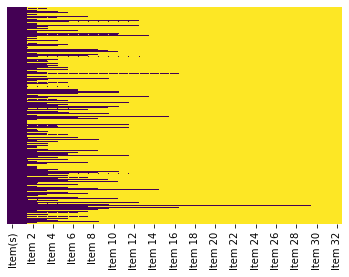

In [84]:
#Visualise if dataset has null values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [98]:
#Getting the list of transactions from the dataset
transactions = []
for i in range(0, 9836):
    transactions.append([str(df.values[i,j]) for j in range(0, 33)])

Now once we are ready with the list of items in our training set, we need to run the apriori algorithm which will learn the list of association rules from the training set. Suppose we want to find the association of items with a product which is sold at least 3 times a day. So, the minimum support here will be 3 items per day multiplied by 7 days of weak and divided by the total number of transactions. 

That means (3*7)/9835 =  0.002135231. So the equivalent 0.002 is taken here as support. Now let us we are looking for a 30% confidence in the association rule so we have kept 0.3 as the minimum confidence. The minimum lift is taken as 3 and the minimum length is considered as 2 because we want to find an association between a minimum of two items. These hyperparameters can be tuned depending on the business requirements. 

In [99]:
# Training Apriori algorithm on the dataset
rule_list = apriori(transactions, min_support = 0.002, min_confidence = 0.3, min_lift = 3, min_length = 2)

After executing the above line of code, we have generated the list of association rules between the items of the retail. To see these rules, the below line of code needs to be executed.

In [100]:
# Visualizing the list of rules
results = list(rule_list)
for i in results:
    print('\n')
    print(i)
    print('**********') 



RelationRecord(items=frozenset({'other vegetables', '12'}), support=0.0075233834892232615, ordered_statistics=[OrderedStatistic(items_base=frozenset({'12'}), items_add=frozenset({'other vegetables'}), confidence=0.6324786324786325, lift=3.269080309542737)])
**********


RelationRecord(items=frozenset({'12', 'root vegetables'}), support=0.004066693777958519, ordered_statistics=[OrderedStatistic(items_base=frozenset({'12'}), items_add=frozenset({'root vegetables'}), confidence=0.34188034188034183, lift=3.1368797040438827)])
**********


RelationRecord(items=frozenset({'tropical fruit', '12'}), support=0.0038633590890605938, ordered_statistics=[OrderedStatistic(items_base=frozenset({'12'}), items_add=frozenset({'tropical fruit'}), confidence=0.3247863247863248, lift=3.0955409792619095)])
**********


RelationRecord(items=frozenset({'13', 'other vegetables'}), support=0.00477836518910126, ordered_statistics=[OrderedStatistic(items_base=frozenset({'13'}), items_add=frozenset({'other veget

**********


RelationRecord(items=frozenset({'beef', 'other vegetables', 'domestic eggs', 'whole milk'}), support=0.0025416836112240747, ordered_statistics=[OrderedStatistic(items_base=frozenset({'beef', 'domestic eggs'}), items_add=frozenset({'whole milk', 'other vegetables'}), confidence=0.423728813559322, lift=5.662767133382461), OrderedStatistic(items_base=frozenset({'beef', 'whole milk', 'domestic eggs'}), items_add=frozenset({'other vegetables'}), confidence=0.6756756756756757, lift=3.4923520472653418)])
**********


RelationRecord(items=frozenset({'beef', 'nan', 'fruit/vegetable juice', 'root vegetables'}), support=0.0022366815778771857, ordered_statistics=[OrderedStatistic(items_base=frozenset({'beef', 'fruit/vegetable juice'}), items_add=frozenset({'nan', 'root vegetables'}), confidence=0.44, lift=4.04093370681606), OrderedStatistic(items_base=frozenset({'beef', 'nan', 'fruit/vegetable juice'}), items_add=frozenset({'root vegetables'}), confidence=0.44, lift=4.037164179104478)

**********


RelationRecord(items=frozenset({'other vegetables', 'whipped/sour cream', 'fruit/vegetable juice', 'yogurt'}), support=0.0023383489223261487, ordered_statistics=[OrderedStatistic(items_base=frozenset({'other vegetables', 'whipped/sour cream', 'fruit/vegetable juice'}), items_add=frozenset({'yogurt'}), confidence=0.5476190476190477, lift=3.9259336387616277), OrderedStatistic(items_base=frozenset({'whipped/sour cream', 'fruit/vegetable juice', 'yogurt'}), items_add=frozenset({'other vegetables'}), confidence=0.6052631578947368, lift=3.128412202339796)])
**********


RelationRecord(items=frozenset({'whole milk', 'other vegetables', 'fruit/vegetable juice', 'yogurt'}), support=0.005083367222448149, ordered_statistics=[OrderedStatistic(items_base=frozenset({'whole milk', 'other vegetables', 'fruit/vegetable juice'}), items_add=frozenset({'yogurt'}), confidence=0.48543689320388345, lift=3.4801437912196778)])
**********


RelationRecord(items=frozenset({'whole milk', 'fruit/veget

RelationRecord(items=frozenset({'butter', 'whole milk', 'other vegetables', 'tropical fruit', 'nan'}), support=0.0032533550223668157, ordered_statistics=[OrderedStatistic(items_base=frozenset({'tropical fruit', 'butter'}), items_add=frozenset({'whole milk', 'other vegetables', 'nan'}), confidence=0.326530612244898, lift=4.369734832708594), OrderedStatistic(items_base=frozenset({'tropical fruit', 'butter', 'nan'}), items_add=frozenset({'whole milk', 'other vegetables'}), confidence=0.32989690721649484, lift=4.408785298072614)])
**********


RelationRecord(items=frozenset({'yogurt', 'butter', 'other vegetables', 'tropical fruit', 'nan'}), support=0.0029483529890199267, ordered_statistics=[OrderedStatistic(items_base=frozenset({'other vegetables', 'butter', 'tropical fruit'}), items_add=frozenset({'nan', 'yogurt'}), confidence=0.5370370370370371, lift=3.8528784072183058), OrderedStatistic(items_base=frozenset({'other vegetables', 'butter', 'yogurt'}), items_add=frozenset({'tropical fruit'